# Introduction

This notebook shows how to plot an XRD plot for the two polymorphs of CsCl ($Pm\overline{3}m$ and $Fm\overline{3}m$) using the xrayutilities simulation library.

First, you should make sure that you have xrayutilities (https://github.com/dkriegner/xrayutilities) installed in your environment. 

In [19]:
# Set up some imports that we will need
from pymatgen import Lattice, Structure
import numpy
import xrayutilities as xru
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from xrayutilities.materials.cif import CIFFile
from xrayutilities.materials.material import Crystal
from IPython.display import Image, display
from tempfile import NamedTemporaryFile


%matplotlib inline
matplotlib.rcParams.update({'font.size': 18})
fig_size = [15, 12]
plt.rcParams["figure.figsize"] = fig_size

# $\alpha$-CsCl ($Pm\overline{3}m$)

Let's start with the typical $\alpha$ form of CsCl.

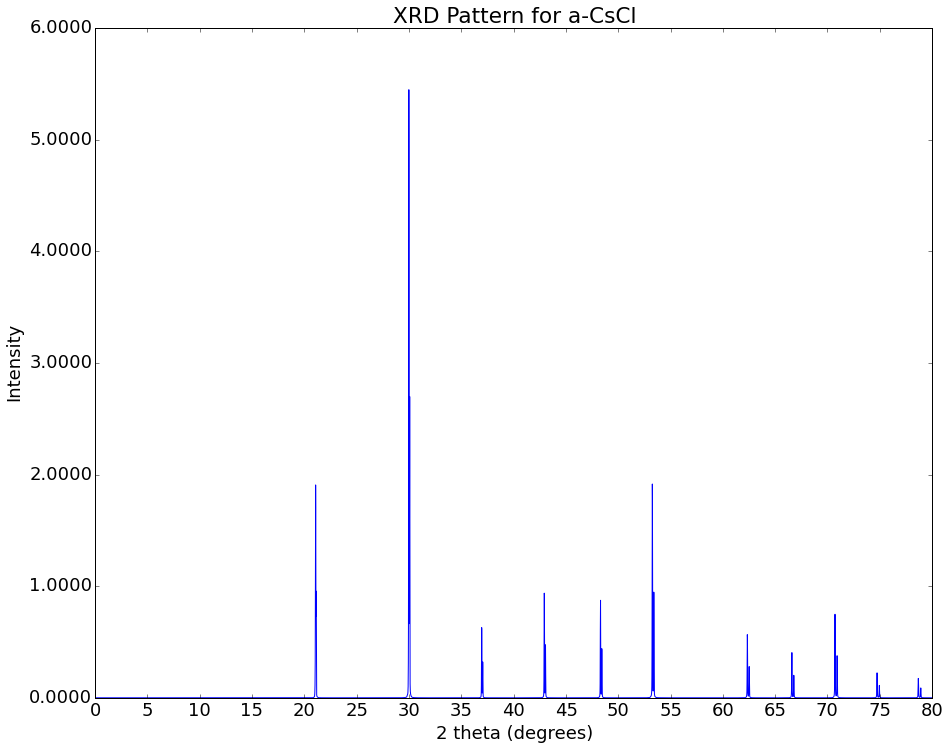

In [22]:
# Create CsCl structure
a = 4.209 #Angstrom
latt = Lattice.cubic(a)

structure = Structure(latt, ["Cs", "Cl"], [[0, 0, 0], [0.5, 0.5, 0.5]])
temp_cif = NamedTemporaryFile(delete=False)
structure.to("cif", temp_cif.name)

xu_cif = CIFFile(temp_cif.name)
xu_crystal = Crystal(name="a-CsCl", lat=xu_cif.SGLattice())
temp_cif.close()

two_theta = numpy.arange(0, 85, 0.01)

powder = xru.simpack.smaterials.Powder(xu_crystal, 1)
pm = xru.simpack.PowderModel(powder, I0=100)
intensities = pm.simulate(two_theta)
plt.plot(two_theta,intensities)
plt.xlim(0,80)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.title("XRD Pattern for " + xu_crystal.name)
plt.xlabel("2 theta (degrees)")
plt.ylabel("Intensity")
plt.show()



Compare it with the experimental XRD pattern below.

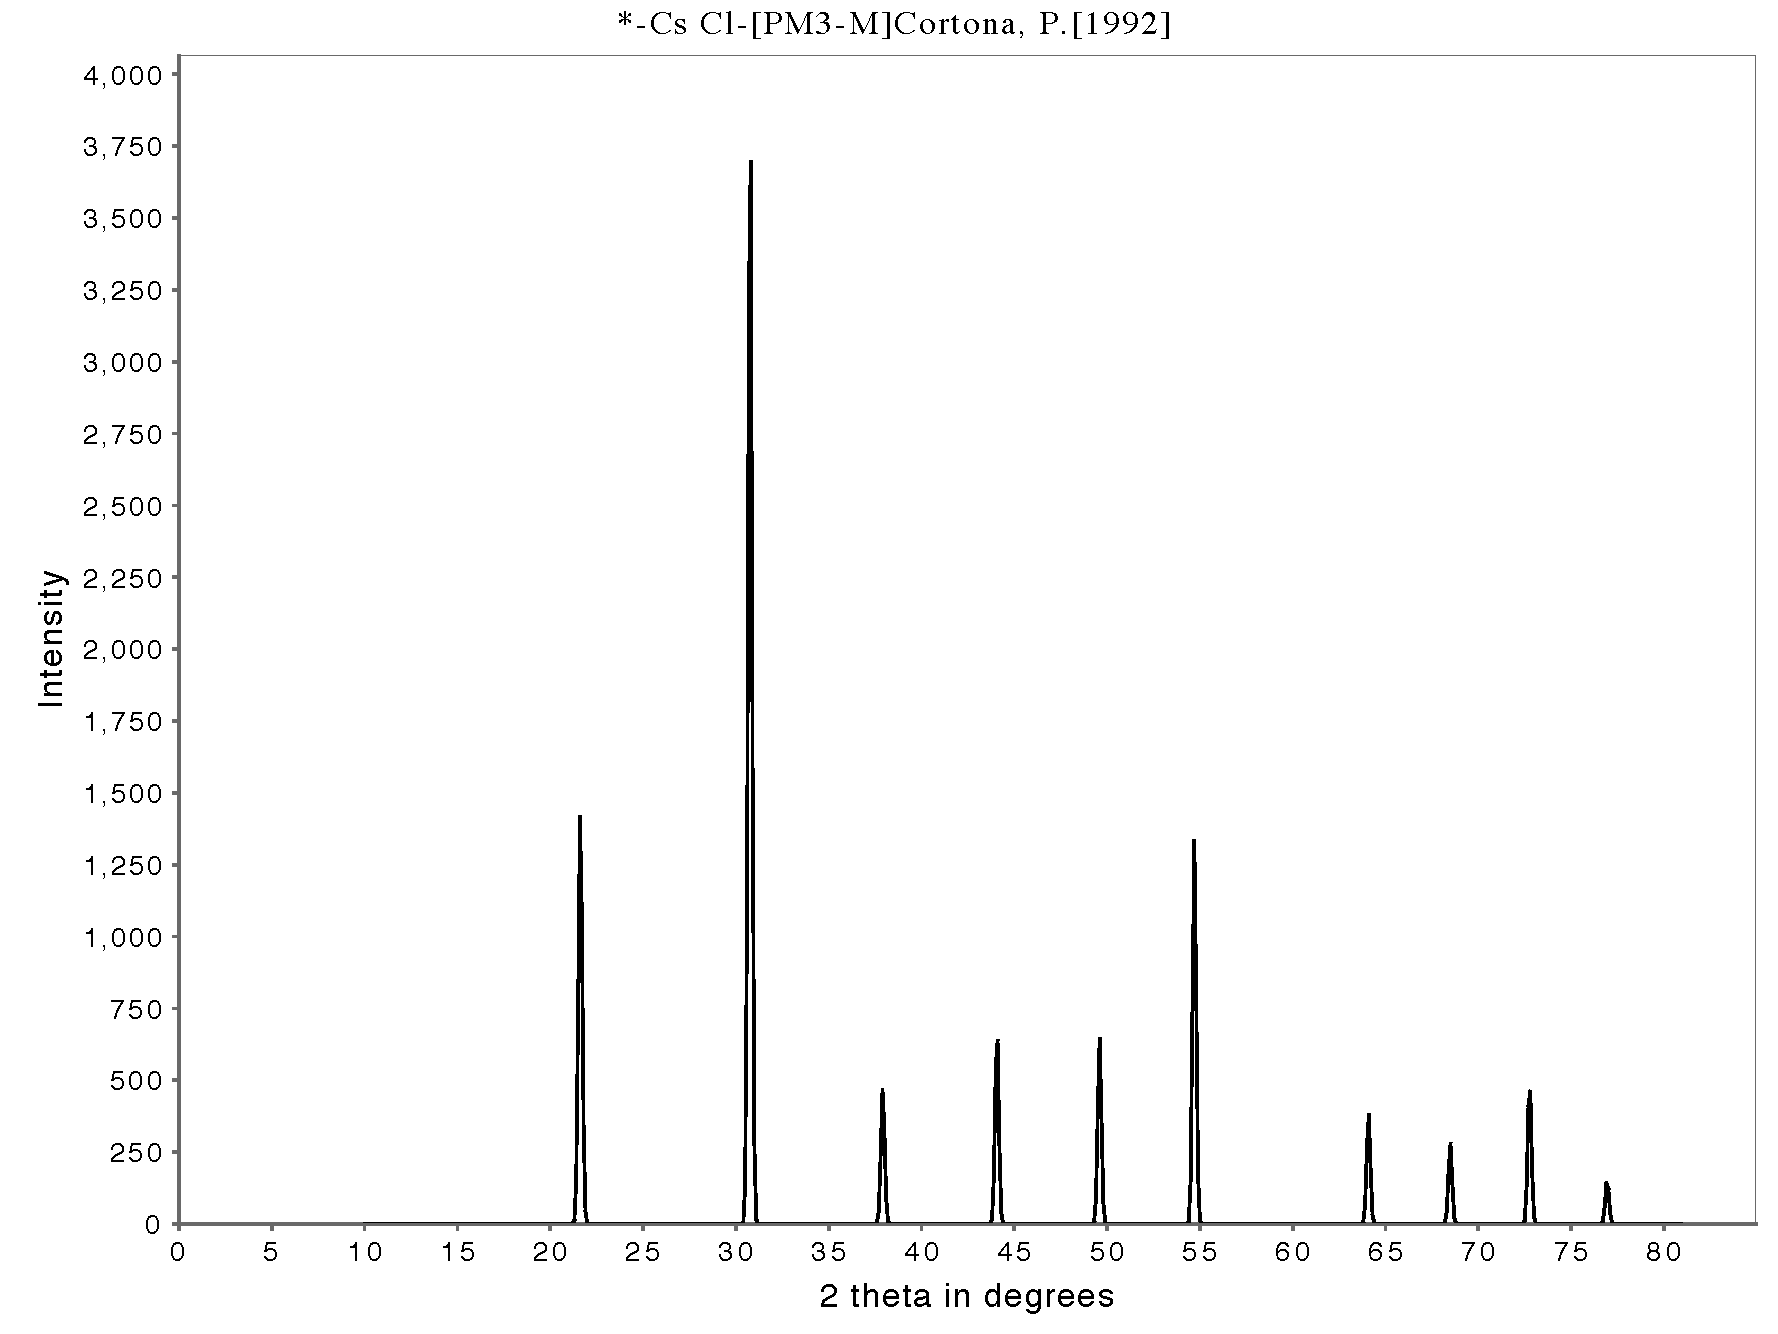

In [23]:
display(Image(filename=('./PDF - alpha CsCl.png')))

# $\beta$-CsCl ($Fm\overline{3}m$)

Let's now look at the $\beta$ (high-temperature) form of CsCl.

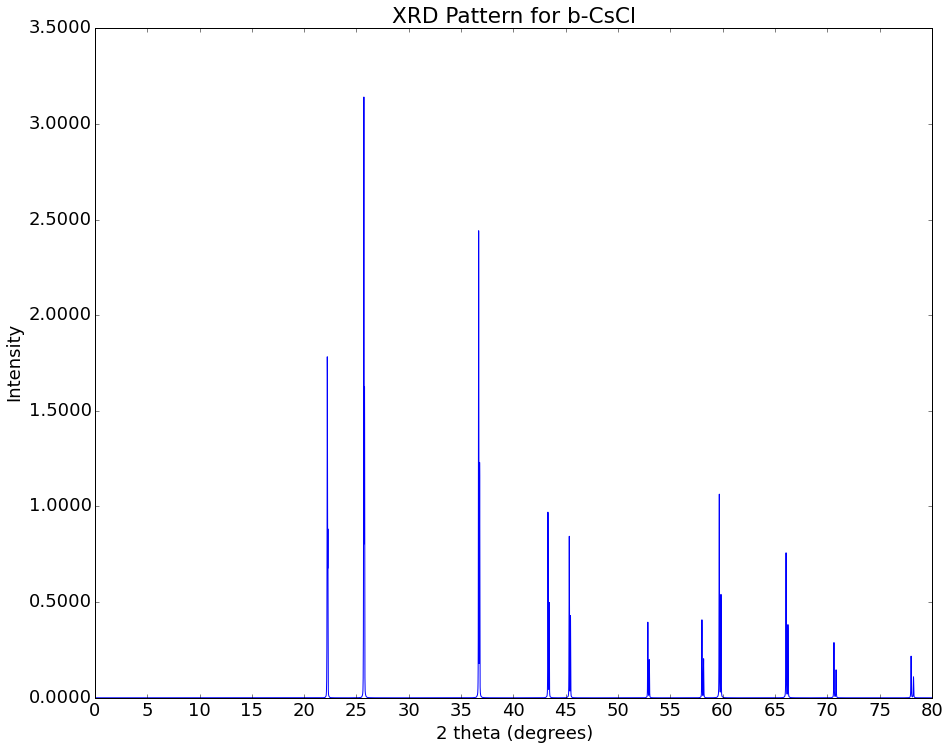

In [25]:
# Create CsCl structure
a = 6.923 #Angstrom
latt = Lattice.cubic(a)
structure = Structure(latt, ["Cs", "Cs", "Cs", "Cs", "Cl", "Cl", "Cl", "Cl"], 
                      [[0, 0, 0], [0.5, 0.5, 0], [0, 0.5, 0.5], [0.5, 0, 0.5], 
                       [0.5, 0.5, 0.5], [0, 0, 0.5], [0, 0.5, 0], [0.5, 0, 0]])

temp_cif = NamedTemporaryFile(delete=False)
structure.to("cif", temp_cif.name)

xu_cif = CIFFile(temp_cif.name)
xu_crystal = Crystal(name="b-CsCl", lat=xu_cif.SGLattice())
temp_cif.close()

two_theta = numpy.arange(0, 80, 0.01)

powder = xru.simpack.smaterials.Powder(xu_crystal, 1)
pm = xru.simpack.PowderModel(powder, I0=100)
intensities = pm.simulate(two_theta)
plt.plot(two_theta,intensities)
plt.xlim(0,80)
ax = plt.axes()
ax.xaxis.set_major_locator(ticker.MultipleLocator(5))
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter('%.4f'))
plt.title("XRD Pattern for " + xu_crystal.name)
plt.xlabel("2 theta (degrees)")
plt.ylabel("Intensity")
plt.show()



Compare it with the experimental XRD pattern below.

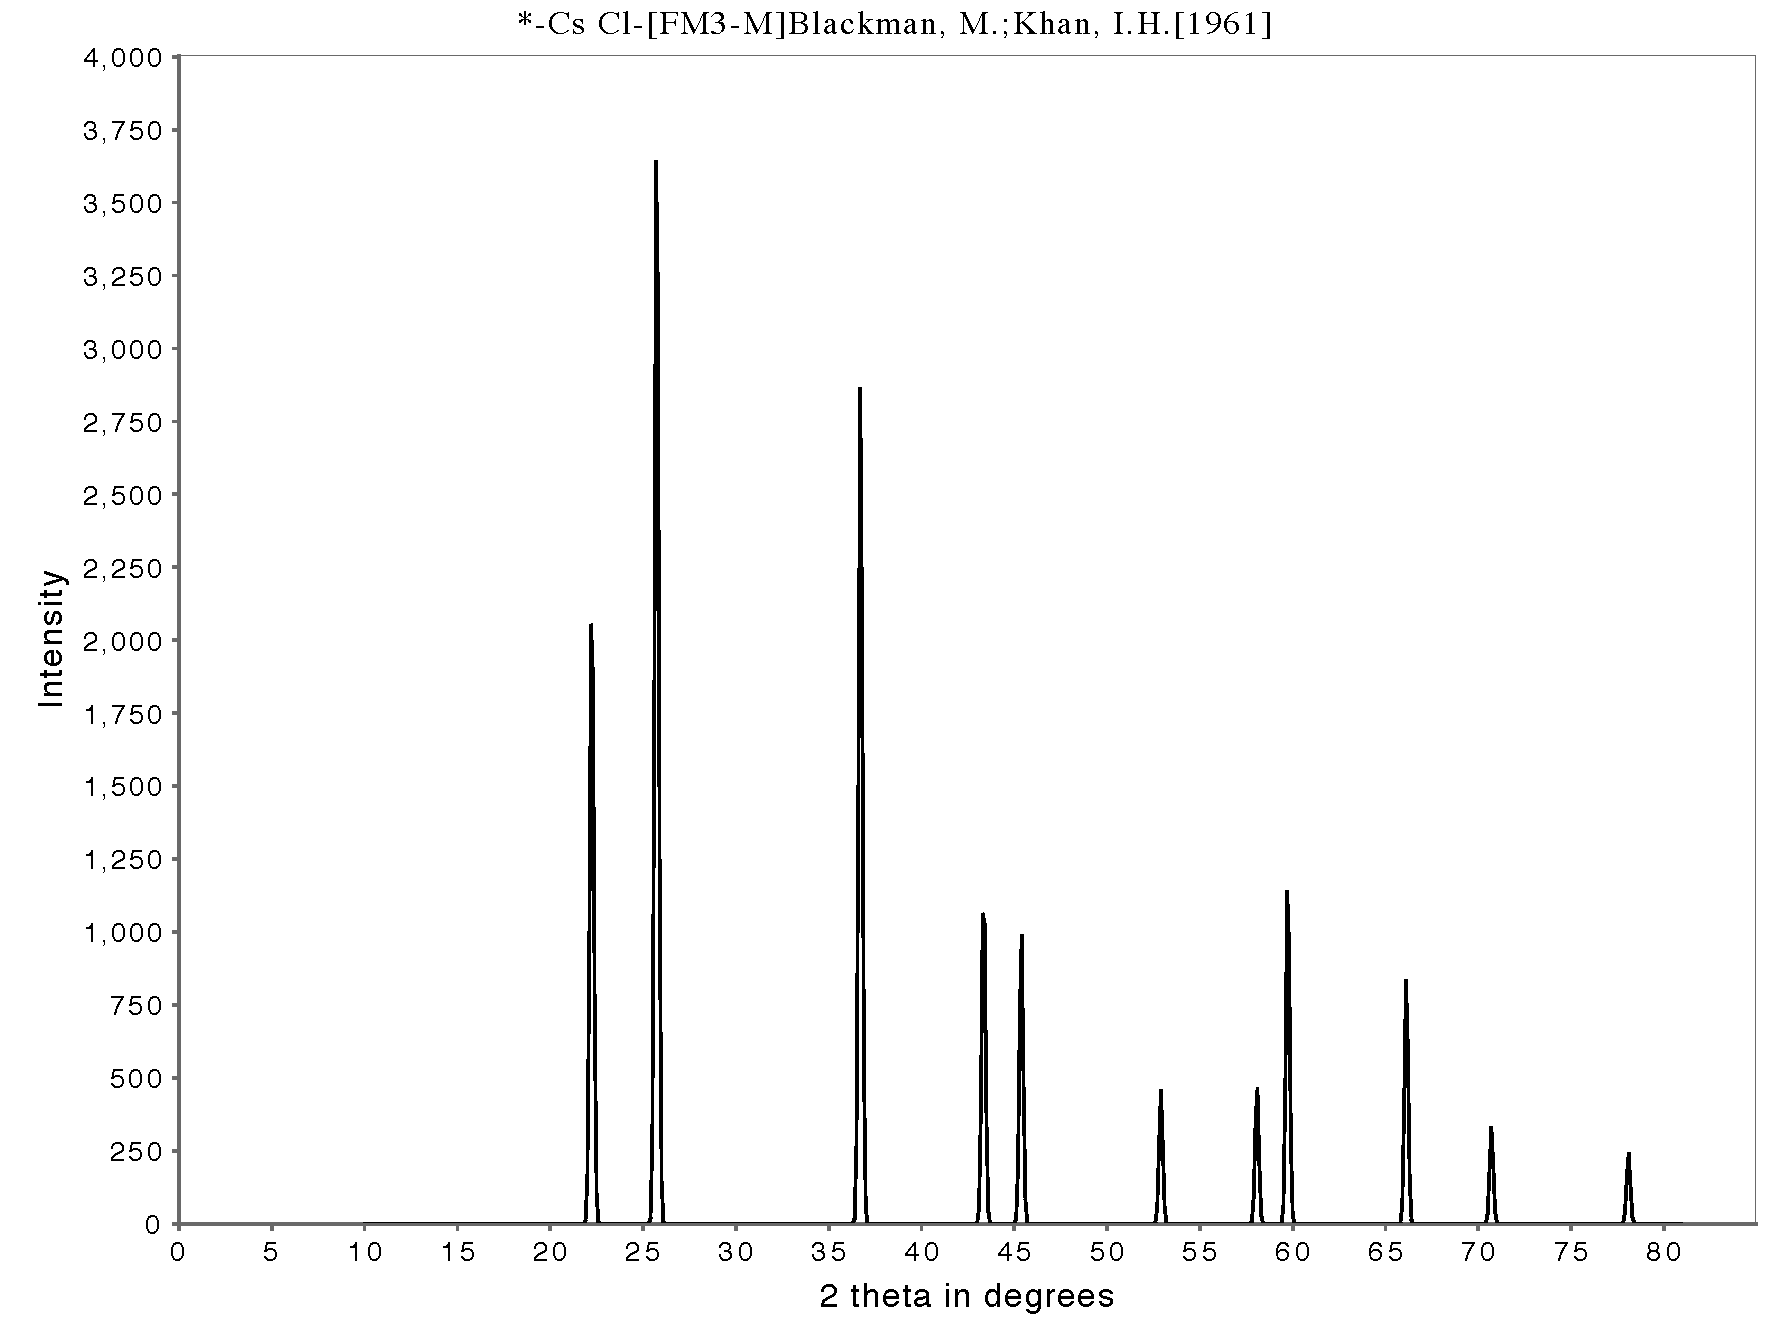

In [13]:
display(Image(filename=('./PDF - beta CsCl.png')))